<a href="https://colab.research.google.com/github/meghaaroraa/hindi-sign-language-recognition/blob/main/sign_language_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For adding hindi letters

In [ ]:
# -*- coding: utf-8 -*-

# Mouting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Generating images

In [ ]:
from PIL import Image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np

Increasing number of images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to original dataset
dataset_dir = '/content/drive/MyDrive/SIGN LANGUAGE - SUMMER INTERNSHIP/DATASET COPY'

# Path to store the augmented images
augmented_dir = '/content/drive/MyDrive/SIGN LANGUAGE - SUMMER INTERNSHIP/DATASET COPY'

# Create the augmented dataset directory if it doesn't exist
os.makedirs(augmented_dir, exist_ok=True)

# Create an ImageDataGenerator instance with desired augmentation settings
datagen = ImageDataGenerator(
    rotation_range=30,      # Rotate images by random angle within ±30 degrees
    width_shift_range=0.2,  # Shift images horizontally by 20% of the width
    height_shift_range=0.2, # Shift images vertically by 20% of the height
    shear_range=0.2,        # Apply shear transformations with shear angle up to 20%
    zoom_range=0.2,         # Zoom images by up to 20%
    horizontal_flip=True,   # Flip images horizontally
    vertical_flip=True,     # Flip images vertically
    brightness_range=(0.8, 1.2)  # Adjust brightness within the range
)

# Iterate over the classes in the original dataset
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    augmented_class_dir = os.path.join(augmented_dir, class_name)
    os.makedirs(augmented_class_dir, exist_ok=True)

    # Generate augmented images for each image in the original dataset
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = Image.open(image_path)
        image = image.convert("RGB")
        image = image.resize((64, 64))  # Resize the image if necessary

        # Generate multiple augmented images from each original image
        aug_images = datagen.flow(np.array(image).reshape(1, 64, 64, 3),
                                  batch_size=1, save_to_dir=augmented_class_dir,
                                  save_prefix='aug', save_format='jpg')

        # Specify the number of augmented images you want to generate per original image
        num_augmented_images = 10

        for i in range(num_augmented_images):
            next(aug_images)

Resizing images

In [ ]:
from PIL import Image
import os

# Path to dataset directory
dataset_dir = '/content/drive/MyDrive/SIGN LANGUAGE - SUMMER INTERNSHIP/DATASET COPY'

# Target size for resizing
target_size = (64, 64)

# Iterate over the folders in the dataset directory
for folder_name in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder_name)

    # Check if the path is a directory
    if os.path.isdir(folder_path):

        # Iterate over the images in the folder
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)

            # Open the image
            image = Image.open(image_path)

            # Resize the image to the target size
            resized_image = image.resize(target_size)

            # Save the resized image, overwriting the original image if needed
            resized_image.save(image_path)

In [ ]:
from PIL import Image

# Path to representative image
image_path = '/content/drive/MyDrive/SIGN LANGUAGE - SUMMER INTERNSHIP/DATASET COPY/अ/20230613_132712.jpg'

# Open the image
image = Image.open(image_path)

# Get the dimensions of the image
image_width, image_height = image.size
num_channels = len(image.getbands())

# Print the input shape
print("Input shape:", (image_height, image_width, num_channels))

Input shape: (64, 64, 3)


Diving into train and test dataset

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to original dataset
dataset_dir = '/content/drive/MyDrive/SIGN LANGUAGE - SUMMER INTERNSHIP/DATASET COPY'

# Path to create the train and test directories
train_dir = '/content/drive/MyDrive/SIGN LANGUAGE - SUMMER INTERNSHIP/DATASET/train'
test_dir = '/content/drive/MyDrive/SIGN LANGUAGE - SUMMER INTERNSHIP/DATASET/test'

# Set the test size (percentage)
test_size = 0.2

# Create the train and test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Lists to store train and test samples
train_samples = []
test_samples = []

# Iterate over the classes in the original dataset
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    class_samples = os.listdir(class_dir)

    # Split the samples into train and test sets
    train_class_samples, test_class_samples = train_test_split(class_samples, test_size=test_size)

    # Append the train and test samples to the respective lists
    train_samples.extend(train_class_samples)
    test_samples.extend(test_class_samples)

    # Create class directories in train and test directories
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Move images to respective train and test directories
    for sample_name in train_class_samples:
        src_path = os.path.join(class_dir, sample_name)
        dst_path = os.path.join(train_class_dir, sample_name)
        shutil.move(src_path, dst_path)

    for sample_name in test_class_samples:
        src_path = os.path.join(class_dir, sample_name)
        dst_path = os.path.join(test_class_dir, sample_name)
        shutil.move(src_path, dst_path)

# Print the number of samples in the train and test sets
print(f"Number of train samples: {len(train_samples)}")
print(f"Number of test samples: {len(test_samples)}")

Number of train samples: 1186
Number of test samples: 317


# Training the model

In [ ]:
# Path to dataset
train_dir = '/content/drive/MyDrive/SIGN LANGUAGE - SUMMER INTERNSHIP/DATASET/train'
test_dir = '/content/drive/MyDrive/SIGN LANGUAGE - SUMMER INTERNSHIP/DATASET/test'

In [ ]:
import os
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Define model parameters
num_classes = 43
input_shape = (64, 64, 3)

In [ ]:
# Data preprocessing and augmentation
train_data = keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    rotation_range=10,  # Augmentation: randomly rotate images by 10 degrees
    width_shift_range=0.1,  # Augmentation: randomly shift images horizontally by 10% of the width
    height_shift_range=0.1,  # Augmentation: randomly shift images vertically by 10% of the height
    shear_range=0.1,  # Augmentation: randomly apply shearing transformations
    zoom_range=0.1,  # Augmentation: randomly zoom into images
)
test_data = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

In [ ]:
# Load and augment training data
train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    class_mode='categorical'
)

Found 1186 images belonging to 43 classes.


In [ ]:
# Load and rescale test data (without augmentation)
test_generator = test_data.flow_from_directory(
    test_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    class_mode='categorical'
)

Found 317 images belonging to 43 classes.


In [ ]:
# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(
    train_generator,
    epochs=3,
    validation_data=test_generator
)

Epoch 1/3
38/38 [==============================] - 20s 521ms/step - loss: 0.0604 - accuracy: 0.9798 - val_loss: 1.4039 - val_accuracy: 0.7508
Epoch 2/3
38/38 [==============================] - 19s 500ms/step - loss: 0.0637 - accuracy: 0.9815 - val_loss: 1.5600 - val_accuracy: 0.7413
Epoch 3/3
38/38 [==============================] - 18s 470ms/step - loss: 0.0379 - accuracy: 0.9890 - val_loss: 1.8775 - val_accuracy: 0.7035


In [ ]:
# Save the trained model
model.save('sign_language_model.h5')

In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow import keras

# Load the trained model from the .h5 file
model = keras.models.load_model('/content/sign_language_model (13).h5')

# Path to your test image
test_image_path = '/content/drive/MyDrive/SIGN LANGUAGE - SUMMER INTERNSHIP/DATASET/test/अ/अ_2.jpg'

# Load and preprocess the test image
test_image = Image.open(test_image_path)
test_image = test_image.resize((64, 64))  # Resize the image to match the model's input shape
test_image = np.array(test_image) / 255.0  # Normalize the image pixel values

# Reshape the image to match the input shape expected by the model
test_image = np.reshape(test_image, (1, 64, 64, 3))

# Make predictions on the test image
predictions = model.predict(test_image)

# Get the predicted class (index with the highest probability)
predicted_class_index = np.argmax(predictions)

# Assuming you have a list of classes, you can retrieve the predicted class label
classes = ['अ','आ','इ','ई','उ','ऊ','ए','ऐ','ओ','औ',
           'क','क्ष','ख','ग','घ','च','छ','ज','ज्ञ','झ','ट','ठ','ड','ढ','ण','त','थ','द','ध','न','प',
           'फ','ब','भ','म','य','र','ल','ळ','व','श','स','ह']
predicted_class_label = classes[predicted_class_index]

# Print the predicted class label
print('Predicted class:', predicted_class_label)

1/1 [==============================] - 0s 41ms/step
Predicted class: अ


#Testing the model

In [ ]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf

# Enable eager execution
tf.config.run_functions_eagerly(True)

model = keras.models.load_model('/content/sign_language_model.h5')

In [ ]:
def get_ground_truth_label(filename):
    # Extract the class or category information from the filename
    label = filename.split('_')[0]

    # Map the label to a numeric value
    label_mapping = {'अ': 0, 'आ': 1, 'इ': 2, 'ई':3, 'उ':4, 'ऊ':5, 'ए':6, 'ऐ':7, 'ओ':8, 'औ':9,
           'क':10, 'क्ष':11, 'ख':12, 'ग':13, 'घ':14, 'च':15, 'छ':16, 'ज':17, 'ज्ञ':18, 'झ':19, 'ट':20,
            'ठ':21, 'ड':22, 'ढ':23, 'ण':24, 'त':25, 'थ':26, 'द':27, 'ध':28, 'न':29, 'प':30,
           'फ':31, 'ब':32, 'भ':33, 'म':34, 'य':35, 'र':36, 'ल':37, 'ळ':38, 'व':39, 'श':40, 'स':41, 'ह':42}

    # Return the ground truth label
    return label_mapping[label]

In [ ]:
import os
import numpy as np
from PIL import Image

# Path to the parent directory containing the image folders
parent_dir = '/content/drive/MyDrive/SIGN LANGUAGE - SUMMER INTERNSHIP/DATASET/test'

# Initialize variables for overall accuracy calculation
total_images = 0
total_correct_predictions = 0

# Iterate over the folders
for folder_name in os.listdir(parent_dir):
    folder_path = os.path.join(parent_dir, folder_name)

    # Initialize variables for folder-wise accuracy calculation
    folder_images = 0
    folder_correct_predictions = 0

    # Iterate over the images in the current folder
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)

        # Load and preprocess the image
        image = Image.open(image_path)
        image = image.resize((64, 64))  # Adjust the size based on your model's input requirements
        image = np.array(image) / 255.0  # Normalize the pixel values

        # Make a prediction
        prediction = model.predict(np.expand_dims(image, axis=0))
        predicted_label = np.argmax(prediction)

        # Compare with ground truth label
        ground_truth_label = get_ground_truth_label(filename)  # Implement your own function to get the ground truth label
        if predicted_label == ground_truth_label:
            folder_correct_predictions += 1

        folder_images += 1
        # total_correct_predictions += 1

    folder_accuracy = folder_correct_predictions / folder_images
    print(f"Accuracy for folder {folder_name}: {folder_accuracy}")

    total_images += folder_images
    total_correct_predictions += folder_correct_predictions

overall_accuracy = total_correct_predictions / total_images
print(f"Overall accuracy: {overall_accuracy}")

1/1 [==============================] - 0s 34ms/step
Accuracy for folder क्ष: 0.7142857142857143
1/1 [==============================] - 0s 38ms/step
Accuracy for folder ळ: 0.7777777777777778
1/1 [==============================] - 0s 41ms/step
Accuracy for folder ज्ञ: 1.0
1/1 [==============================] - 0s 44ms/step
Accuracy for folder आ: 0.7142857142857143
1/1 [==============================] - 0s 43ms/step
Accuracy for folder अ: 0.9090909090909091
1/1 [==============================] - 0s 37ms/step
Accuracy for folder ई: 0.8888888888888888
1/1 [==============================] - 0s 43ms/step
Accuracy for folder इ: 0.6
1/1 [==============================] - 0s 41ms/step
Accuracy for folder ए: 0.7777777777777778
1/1 [==============================] - 0s 34ms/step
Accuracy for folder ऊ: 0.6
1/1 [==============================] - 0s 48ms/step
Accuracy for folder उ: 0.8888888888888888
1/1 [==============================] - 0s 46ms/step
Accuracy for folder औ: 0.7142857142857143
1/1 [==

# Model summary

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)        

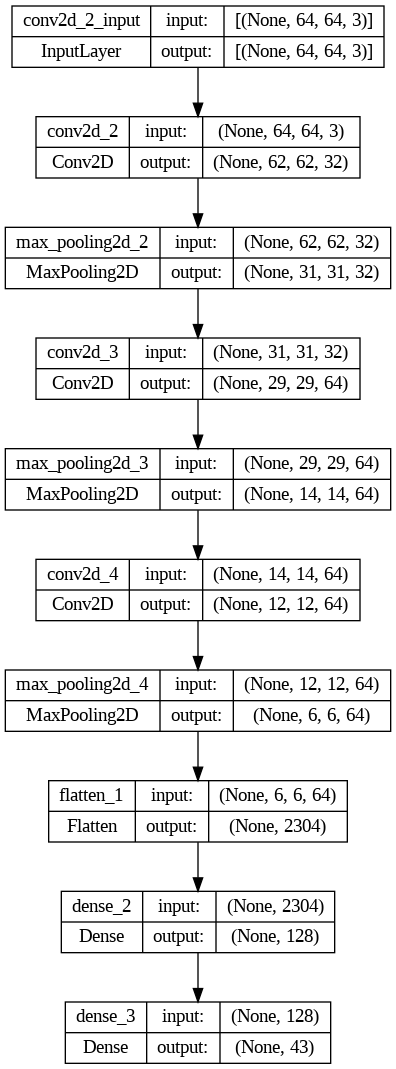

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
for layer in model.layers:
    print(layer.name, layer.output_shape)

conv2d_2 (None, 62, 62, 32)
max_pooling2d_2 (None, 31, 31, 32)
conv2d_3 (None, 29, 29, 64)
max_pooling2d_3 (None, 14, 14, 64)
conv2d_4 (None, 12, 12, 64)
max_pooling2d_4 (None, 6, 6, 64)
flatten_1 (None, 2304)
dense_2 (None, 128)
dense_3 (None, 43)
